In [116]:
!pip install torch
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [117]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [118]:
torch.manual_seed(32)
model = Model()

In [119]:
df = pd.read_csv("Data/iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


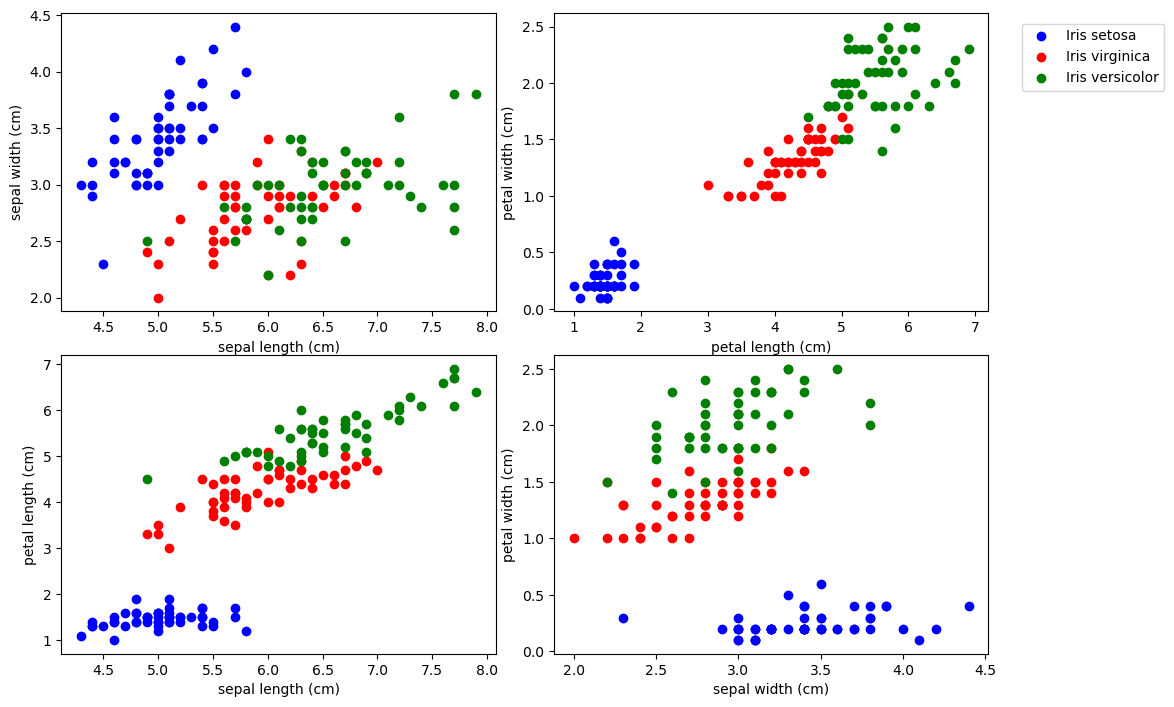

In [120]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()


plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']


for i, ax in enumerate(axes.flat):
    
    for j in range(3):
        
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

        
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))

plt.show()

In [121]:
X = df.drop('target',axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [122]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [123]:
epochs = 100
losses = []

for i in range(epochs):
    
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i}  loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1  loss: 1.1166610717773438
epoch: 11  loss: 0.9184657335281372
epoch: 21  loss: 0.7679059505462646
epoch: 31  loss: 0.5897083878517151
epoch: 41  loss: 0.38456210494041443
epoch: 51  loss: 0.24146941304206848
epoch: 61  loss: 0.14346204698085785
epoch: 71  loss: 0.0980340763926506
epoch: 81  loss: 0.0800677090883255
epoch: 91  loss: 0.07168805599212646


Text(0.5, 0, 'epoch')

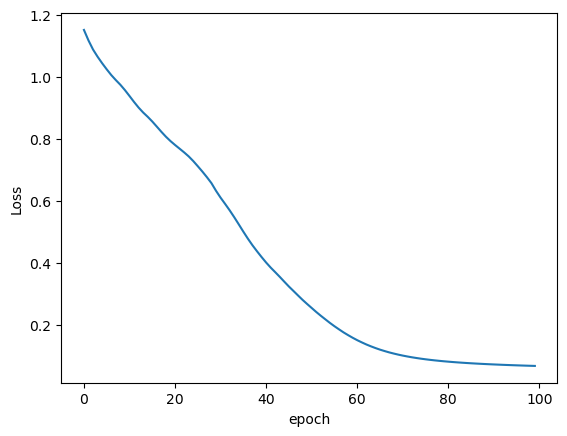

In [125]:
losses= [ loss.detach().numpy() for loss in losses]

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [127]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)    

In [128]:
loss

tensor(0.0581)

In [144]:
correct = 0 

with torch.no_grad():
    
    for i, data in enumerate(X_test):
        
        y_val = model.forward(data)
        
        print(f'{i+1}.) {str(y_val.argmax().item())} VS. {y_test[i]}')
        
        if y_val.argmax().item() == y_test[i]:
            correct+=1
print(f'you got {correct} correct')

1.) 1 VS. 1
2.) 1 VS. 1
3.) 0 VS. 0
4.) 1 VS. 1
5.) 2 VS. 2
6.) 2 VS. 2
7.) 0 VS. 0
8.) 0 VS. 0
9.) 2 VS. 2
10.) 2 VS. 2
11.) 2 VS. 2
12.) 0 VS. 0
13.) 2 VS. 2
14.) 1 VS. 1
15.) 2 VS. 2
16.) 1 VS. 1
17.) 2 VS. 2
18.) 0 VS. 0
19.) 1 VS. 1
20.) 2 VS. 2
21.) 0 VS. 0
22.) 0 VS. 0
23.) 2 VS. 2
24.) 0 VS. 0
25.) 2 VS. 2
26.) 2 VS. 2
27.) 1 VS. 1
28.) 1 VS. 1
29.) 2 VS. 2
30.) 2 VS. 2
you got 30 correct


In [145]:
torch.save(model.state_dict(), 'my_iris_model.pt')

In [148]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))


<All keys matched successfully>

In [149]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [150]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

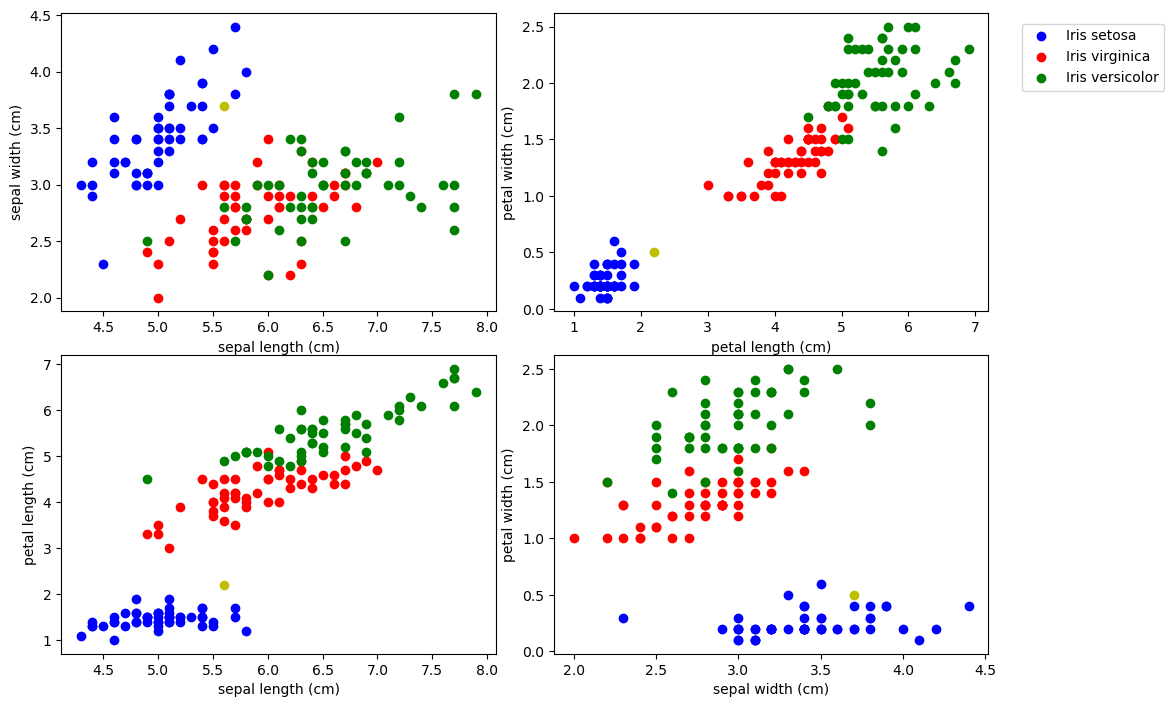

In [152]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()


plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']


for i, ax in enumerate(axes.flat):
    
    for j in range(3):
        
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        
        ax.scatter(df[df['target']==j][x], df[df['target']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    ax.scatter(mystery_iris[plots[i][0]],mystery_iris[plots[i][1]], color='y')

        
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))

plt.show()

In [ ]:
with torch.no_grad():
    
    for i, data in enumerate(X_test):
        
        y_val = model.forward(data)